📌 Upload an image to test Transfer Learning:


Saving Dog.jpg to Dog.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


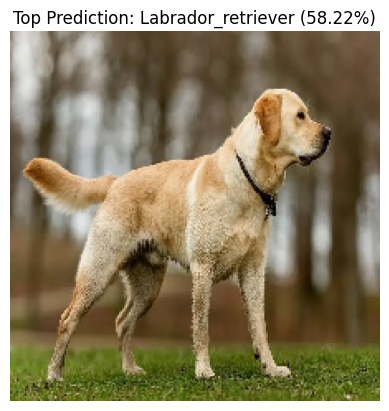

1. Labrador_retriever: 58.22%
2. golden_retriever: 18.28%
3. dingo: 1.64%


In [2]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2  # Pre-trained model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files  # For manual file upload

# Step 2: Load the pre-trained MobileNetV2 model
# **TRANSFER LEARNING HAPPENS HERE**: We use a model already trained on ImageNet.
base_model = MobileNetV2(weights='imagenet', include_top=True)  # Keep classification layer

# **TRANSFER LEARNING - Feature Extraction**: Freeze the model to retain learned features.
base_model.trainable = False  # Model will not be trained, only used for inference.

# Step 3: Upload an image manually
print("📌 Upload an image to test Transfer Learning:")
uploaded = files.upload()  # Opens file picker in Colab

# Get uploaded file name
img_path = list(uploaded.keys())[0]  # Automatically gets the uploaded image name

# Step 4: Load and preprocess the uploaded image
img = image.load_img(img_path, target_size=(224, 224))  # Resize image
img_array = image.img_to_array(img)  # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Normalize

# Step 5: Make prediction using the pre-trained model
predictions = base_model.predict(img_array)
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]  # Get top-3 predictions

# Step 6: Display the image and prediction results
plt.imshow(img)
plt.axis('off')
plt.title(f"Top Prediction: {decoded_predictions[0][1]} ({decoded_predictions[0][2]*100:.2f}%)")
plt.show()

# Print top-3 predicted labels with confidence
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}. {label}: {score*100:.2f}%")
